In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
from matplotlib.colors import LogNorm
import os

import timeit
#import Double_Null_utils as dnu
from scipy import optimize
import tables
import h5py



#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

### This code checks the 2nd-order convergence of functions.
Currently is only able for check r, sigma, and phi and not for the derivatives. Also it requires 4 sets of arrays, all assumed to be double the resolution (half the step-size) of the last (e.g. N=10,20,40,80)

In [2]:
uscal=1
vscal=1

path="num-rel-pics/convergence-checks"
try:
    os.mkdir(path)
except:
    print("File already exists")

File already exists


uscal and vscal reduce arrays by their value in order to prevent memory overflow. Use when h5 files are very large (i.e. >2gB)

In [3]:
rnputil=np.load('rnputil.npy')
wHD=rnputil[8]
print(wHD)


True


In [4]:
Elist=[]

#funcchoice='r' ###can choose 'r', 'sig, 'phi'
func='dphinpv'

if wHD==True or wHD==1.0 or wHD=='True':
    urange=np.load('urange.npy')[::uscal]
    vrange=np.load('vrange.npy')[::vscal]
if wHD==False or wHD==0.0 or wHD==None or wHD=='False':
    urange=np.load('urange.npy')
    vrange=np.load('vrange.npy')

#if funcchoice=='r':
if wHD==True or wHD==1.0 or wHD=='True':
    
    with h5py.File(func+'1.h5','r') as f:
        r_group_key = list(f.keys())[0]
        rnpi=f[r_group_key]
        rnp = np.asarray(rnpi[::uscal,::vscal])
       
    print(len(rnp),len(rnp[1,:]))
    rnp=rnp[:-1]
    Elist.append(1)
    try:
        with h5py.File(func+'2.h5','r') as f:
            r_group_key = list(f.keys())[0]
            rnpi=f[r_group_key]
            rnp2 = np.asarray(rnpi[::uscal,::vscal]) 
        print(len(rnp),len(rnp2[1,:]))
        kval=int(len(rnp2)/len(rnp))
        Elist.append(kval)
        rnp2= np.asarray(rnp2[::kval,::kval])
        rnp2=rnp2[:-1]
        print(len(rnp2),len(rnp2[1,:]))
    except:
        pass
    try:
        with h5py.File(func+'3.h5','r') as f:
            r_group_key = list(f.keys())[0]
            rnpi=f[r_group_key]
            rnp3 = np.asarray(rnpi[::uscal,::vscal]) 
        print(len(rnp),len(rnp3[1,:]))
        kval=int(len(rnp3)/len(rnp))
        Elist.append(kval)
        rnp3= np.asarray(rnp3[::kval,::kval])
        rnp3=rnp3[:-1]
        print(len(rnp3),len(rnp3[1,:]))
    except:
        pass
    try:
        with h5py.File(func+'4.h5','r') as f:
            r_group_key = list(f.keys())[0]
            rnpi=f[r_group_key]
            rnp4 = np.asarray(rnpi[::uscal,::vscal]) 
        print(len(rnp),len(rnp4[1,:]))
        kval=int(len(rnp4)/len(rnp))
        Elist.append(kval)
        rnp4= np.asarray(rnp4[::kval,::kval])
        #rnp4=rnp4[:-1]
        rnp4=rnp4[:-1]
        print(len(rnp4),len(rnp4[1,:]))
    except:
        pass
    

    print(str(rnp.nbytes)+" bytes")
    print("Hd5 files used")

if wHD==False or wHD==0.0 or wHD==None or wHD=='False':
    rnp=np.load('rnp.npy')
    rnp2=np.load('rnp2.npy')
    rnp3=np.load('rnp3.npy')
    rnp4=np.load('rnp4.npy')
    
    
    print("Numpy arrays used")

switchax=float(rnputil[9])
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    rnp2=np.swapaxes(rnp2,0,1)
    rnp3=np.swapaxes(rnp3,0,1)
    rnp4=np.swapaxes(rnp4,0,1)

print('------')
print(len(rnp),len(rnp2),len(rnp3),len(rnp4))    
print(len(rnp[1,:]),len(rnp2[1,:]),len(rnp3[1,:]),len(rnp4[1,:])) 
urange=np.insert(urange,0,0.0)
    
if len(rnp)==len(urange):
    pass
else:
    print(len(rnp),len(urange),len(vrange))
    kval=int(len(urange)/len(rnp))
    print(kval)
    urange=urange[::kval]
    vrange=vrange[::kval]
urange=urange[:-1]
   
print(len(urange),len(vrange))


501 50
500 100
500 50
500 200
500 50
500 400
500 50
200000 bytes
Hd5 files used
------
500 500 500 500
50 50 50 50
500 4002 400
8
500 50


In [5]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)


dv0=vrange[1]-vrange[0]

def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M0,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]

print(Nu,Nv)

['1600400' '4001' '400' '10.0' '0.40405' '1.0' '0.9' '0.0' 'True' '0.0'
 'edd']
500 50


In [6]:
print(Elist)

[1, 2, 4, 8]


In [7]:
diff21=np.abs((rnp2-rnp))#/rnp2)
diff32=np.abs((rnp3-rnp2))#/rnp3)
diff43=np.abs((rnp4-rnp3))#/rnp4)
print(urange)

[0.       0.009375 0.019375 0.029375 0.039375 0.049375 0.059375 0.069375
 0.079375 0.089375 0.099375 0.109375 0.119375 0.129375 0.139375 0.149375
 0.159375 0.169375 0.179375 0.189375 0.199375 0.209375 0.219375 0.229375
 0.239375 0.249375 0.259375 0.269375 0.279375 0.289375 0.299375 0.309375
 0.319375 0.329375 0.339375 0.349375 0.359375 0.369375 0.379375 0.389375
 0.399375 0.409375 0.419375 0.429375 0.439375 0.449375 0.459375 0.469375
 0.479375 0.489375 0.499375 0.509375 0.519375 0.529375 0.539375 0.549375
 0.559375 0.569375 0.579375 0.589375 0.599375 0.609375 0.619375 0.629375
 0.639375 0.649375 0.659375 0.669375 0.679375 0.689375 0.699375 0.709375
 0.719375 0.729375 0.739375 0.749375 0.759375 0.769375 0.779375 0.789375
 0.799375 0.809375 0.819375 0.829375 0.839375 0.849375 0.859375 0.869375
 0.879375 0.889375 0.899375 0.909375 0.919375 0.929375 0.939375 0.949375
 0.959375 0.969375 0.979375 0.989375 0.999375 1.009375 1.019375 1.029375
 1.039375 1.049375 1.059375 1.069375 1.079375 1.089

500


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


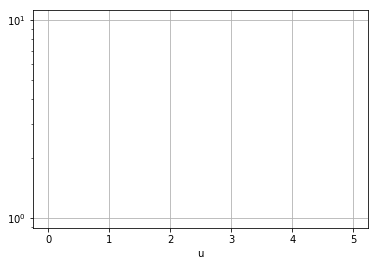

In [8]:
print(Nu)
vind=10
plt.plot(urange,diff21[:,vind])
plt.plot(urange,diff32[:,vind])
plt.plot(urange,diff43[:,vind])
plt.yscale('log')
plt.xlabel('u')
plt.grid()
plt.show()

500 50


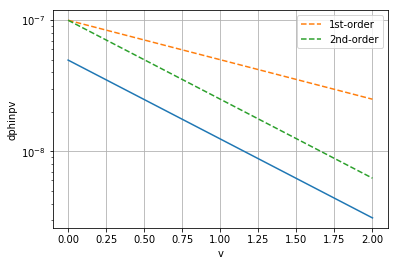

3.99937499999974


In [9]:
print(Nu,Nv)
uind=400
vind=45
klist=np.array([0,1,2])
plt.plot(klist,[diff21[uind][vind],diff32[uind][vind],diff43[uind][vind]])
plt.plot(klist,2.0**(-1*klist)*10**(-7),'--',label='1st-order')
plt.plot(klist,2.0**(-2*klist)*10**(-7),'--',label='2nd-order')

plt.yscale('log')
plt.xlabel('v')
plt.ylabel(func)
plt.grid()
plt.legend(loc='best')
#plt.plot(vrange,diff32[uind])
#plt.plot(vrange,diff43[uind])
plt.savefig(path+'/'+func+'.png',dpi=300)
plt.show()

print(urange[uind])

In [10]:
print(Nu,Nv)
uind=22
vind=90
klist=np.array([0,1,2])
Errorlist=4.0/3.0*(dv0)**(-2.0)*np.array([diff21[uind][vind],diff32[uind][vind],diff43[uind][vind]])
plt.plot(klist,Errorlist)
#plt.plot(klist,2.0**(-1*klist)*10**(-6),'--',label='1st-order')
#plt.plot(klist,2.0**(-2*klist)*10**(-6),'--',label='2nd-order')

plt.yscale('log')
plt.grid()
#plt.legend(loc='best')
#plt.plot(vrange,diff32[uind])
#plt.plot(vrange,diff43[uind])
plt.show()

500 50


IndexError: index 90 is out of bounds for axis 0 with size 50